# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

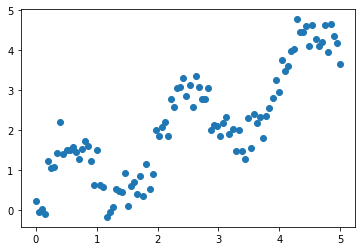

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5967165173817509


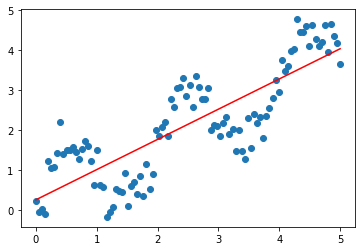

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

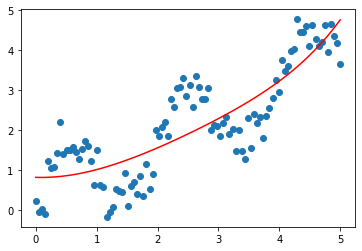

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.04482561  0.26626043 -0.02075442 -0.00732975  0.00150088]
interception:  0.8154556223162355


In [15]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.81545562, 0.81386815, 0.81362231, 0.81470043, 0.81708379,
       0.82075271, 0.82568661, 0.83186405, 0.8392628 , 0.84785992,
       0.85763178, 0.86855414, 0.88060221, 0.8937507 , 0.9079739 ,
       0.92324571, 0.93953973, 0.95682929, 0.97508752, 0.99428743,
       1.01440192, 1.03540391, 1.05726632, 1.0799622 , 1.10346473,
       1.12774732, 1.15278367, 1.17854779, 1.2050141 , 1.23215747,
       1.25995327, 1.28837746, 1.31740663, 1.34701804, 1.37718972,
       1.40790051, 1.43913009, 1.47085911, 1.50306916, 1.53574292,
       1.56886413, 1.60241772, 1.63638985, 1.67076795, 1.70554077,
       1.74069851, 1.77623278, 1.81213674, 1.84840511, 1.88503427,
       1.92202226, 1.95936892, 1.99707586, 2.0351466 , 2.07358657,
       2.1124032 , 2.15160598, 2.19120649, 2.2312185 , 2.27165799,
       2.31254326, 2.35389492, 2.395736  , 2.43809201, 2.48099096,
       2.52446347, 2.56854278, 2.61326484, 2.65866838, 2.70479492,
       2.75168889, 2.79939762, 2.84797148, 2.89746388, 2.94793

In [16]:
regr_poly.predict(X_poly)

array([0.81545562, 0.81386815, 0.81362231, 0.81470043, 0.81708379,
       0.82075271, 0.82568661, 0.83186405, 0.8392628 , 0.84785992,
       0.85763178, 0.86855414, 0.88060221, 0.8937507 , 0.9079739 ,
       0.92324571, 0.93953973, 0.95682929, 0.97508752, 0.99428743,
       1.01440192, 1.03540391, 1.05726632, 1.0799622 , 1.10346473,
       1.12774732, 1.15278367, 1.17854779, 1.2050141 , 1.23215747,
       1.25995327, 1.28837746, 1.31740663, 1.34701804, 1.37718972,
       1.40790051, 1.43913009, 1.47085911, 1.50306916, 1.53574292,
       1.56886413, 1.60241772, 1.63638985, 1.67076795, 1.70554077,
       1.74069851, 1.77623278, 1.81213674, 1.84840511, 1.88503427,
       1.92202226, 1.95936892, 1.99707586, 2.0351466 , 2.07358657,
       2.1124032 , 2.15160598, 2.19120649, 2.2312185 , 2.27165799,
       2.31254326, 2.35389492, 2.395736  , 2.43809201, 2.48099096,
       2.52446347, 2.56854278, 2.61326484, 2.65866838, 2.70479492,
       2.75168889, 2.79939762, 2.84797148, 2.89746388, 2.94793

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3

In [19]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [20]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

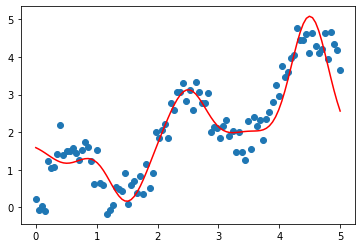

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [23]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.54471631 -1.56730715  1.41023623  0.28327087  3.3611695 ]
interception:  1.7242829409557312


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

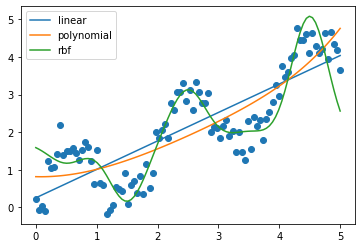

In [25]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [26]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5967165173817509


In [27]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5311695908891503


In [28]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.3050001470347594
